# Importing packages and loading dataset 





In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split
# this will filter warnings if they pop up 
warnings.filterwarnings('ignore')

In [33]:
metadata = pd.read_excel("ENB2012_data.xlsx")
metadata

# this tells us it has 8 features and 2 prediction targets: heating and cooling loads. There is a 
# total of 768 samples in this dataset. 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Exploring the dataset

Our main objective is to predict heating and cooling loads which I will figure out by understanding the data

In [34]:
metadata.describe()

# y1 is the heating load 
# y2 is the cooling load 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


No handles with labels found to put in legend.


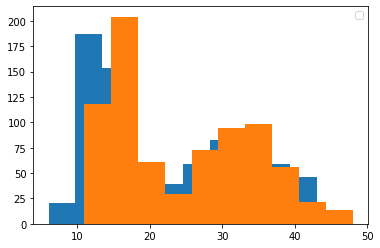

In [35]:
# histogram of the cooling and heating columns
plt.hist(metadata['Y1'])
plt.hist(metadata['Y2'])
plt.legend()

In [36]:
pd.isnull(metadata).sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

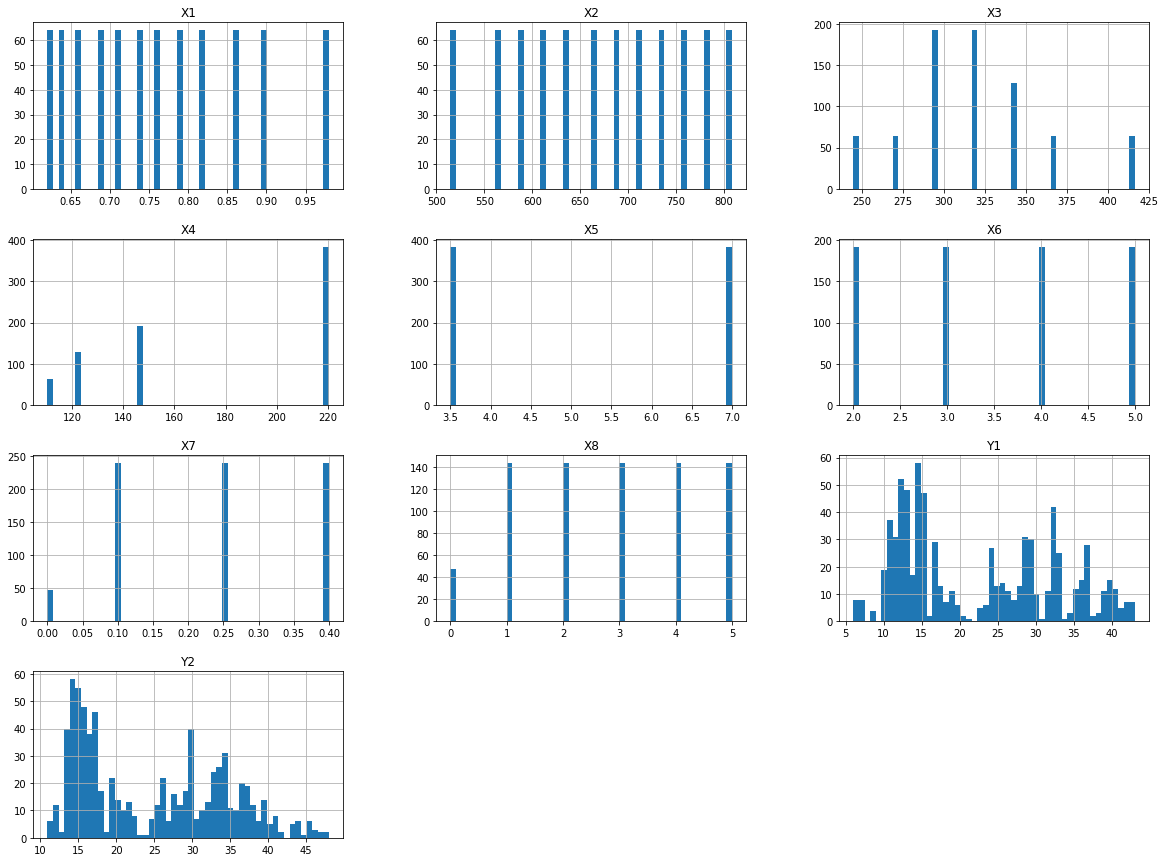

In [37]:
# this is printing the data for each column
metadata.hist(bins = 50, figsize = (20, 15))
plt.show()

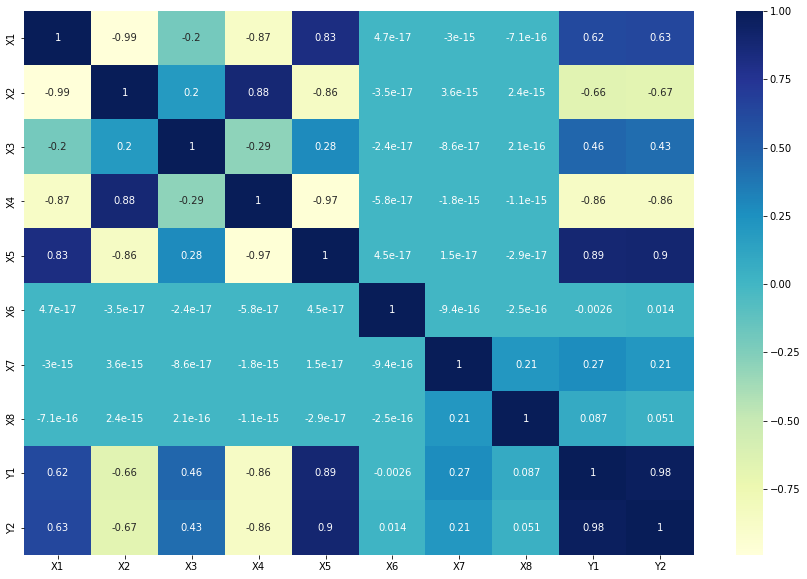

In [38]:
plt.subplots(figsize = (15, 10))
corr = metadata.corr()
sns.heatmap(corr, annot = True, cmap = "YlGnBu")

# Preprocessing Data

In [39]:
# I will add a column for overall load
# Y3 = overall load 
metadata['Overall Load'] = metadata['Y1'] + metadata['Y2']
metadata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Overall Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


In [40]:
metadata.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Overall Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760,46.894956
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306,19.484955
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,16.950000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,28.750000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,40.970000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,64.335000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,89.950000


In [41]:
metadata['Efficiency'] = np.where(metadata['Overall Load'] < 29, 'Low', np.where(metadata['Overall Load'] < 64, 'Average', 'High'))
metadata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Overall Load,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [42]:
# this will tell me how many samples are average, low and high 
metadata['Efficiency'].value_counts()

Average    368
Low        207
High       193
Name: Efficiency, dtype: int64

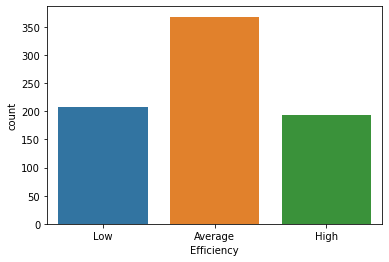

In [43]:
# plot the data received above into a histogram
sns.countplot(x = 'Efficiency', data = metadata, order = ['Low', 'Average', 'High'])

# Splitting cooling and heating into 2 datasets

In [44]:
# creating separate dataset for the heating load and dropping cooling load column
heat_dataset = metadata.drop(columns=['Y2','Overall Load','Efficiency'])
heat_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [45]:
# created separate dataset for cooling load 
cooling_dataset = metadata.drop(columns=['Y1','Overall Load','Efficiency'])
cooling_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


# Models for Y1

##Neural Network regressor

In [46]:
X = heat_dataset.drop(columns=['Y1'])
y= heat_dataset['Y1']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from keras.models import Sequential
from keras.layers import Dense

keras_s = Sequential()
keras_s.add(Dense(5, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
keras_s.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
keras_s.add(Dense(1, activation = 'linear'))

keras_s.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

keras_s.fit(X_train, y_train, batch_size = 10, epochs = 75)

Epoch 1/75
54/54 [==============================] - 1s 2ms/step - loss: 584.8694 - mse: 584.8694
Epoch 2/75
54/54 [==============================] - 0s 1ms/step - loss: 572.6830 - mse: 572.6830
Epoch 3/75
54/54 [==============================] - 0s 2ms/step - loss: 543.8418 - mse: 543.8418
Epoch 4/75
54/54 [==============================] - 0s 2ms/step - loss: 490.6619 - mse: 490.6619
Epoch 5/75
54/54 [==============================] - 0s 2ms/step - loss: 412.4967 - mse: 412.4967
Epoch 6/75
54/54 [==============================] - 0s 2ms/step - loss: 320.0007 - mse: 320.0007
Epoch 7/75
54/54 [==============================] - 0s 2ms/step - loss: 232.4709 - mse: 232.4709
Epoch 8/75
54/54 [==============================] - 0s 2ms/step - loss: 166.5753 - mse: 166.5753
Epoch 9/75
54/54 [==============================] - 0s 2ms/step - loss: 129.9864 - mse: 129.9864
Epoch 10/75
54/54 [==============================] - 0s 2ms/step - loss: 113.6795 - mse: 113.6795
Epoch 11/75
54/54 [==========

In [49]:
from sklearn.metrics import r2_score

y_predict2_test = keras_s.predict(X_test)
mean_error = mean_squared_error(y_test, y_predict2_test, squared = False)

print("Mean square error: ", mean_error)
print("Variance Score: ", explained_variance_score(y_test, y_predict2_test))

Mean square error:  2.8503867877634272
Variance Score:  0.9210421765874391


##Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)

In [51]:
squared_error = mean_squared_error(y_test, y_predict, squared = False)

print("Mean square error: ", squared_error)
print("Variance Score: ", explained_variance_score(y_test, y_predict))

Mean square error:  2.9731323460930295
Variance Score:  0.9134167354349914


##Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_pol = poly.fit_transform(X_train)
print(X_train.shape, X_train_pol.shape)

(537, 8) (537, 45)


In [53]:
# Train (i.e., find coefficients)
reg = LinearRegression().fit(X_train_pol, y_train)

# Test (i.e., make predictions) 
y_pred = reg.predict(poly.transform(X_test))

# Evaluate (we use RMSE)
squ_err = mean_squared_error(y_test, y_pred, squared = False)
print("Mean square error: ", squ_err)
print("Variance Score: ", explained_variance_score(y_test, y_pred))

Mean square error:  0.8023468127882849
Variance Score:  0.993702512299353


# Models for Y2

## Neural Network Regressor 

In [54]:
X = cooling_dataset.drop(columns=['Y2'])
y = cooling_dataset['Y2']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from keras.models import Sequential
from keras.layers import Dense

keras_s = Sequential()
keras_s.add(Dense(5, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
keras_s.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
keras_s.add(Dense(1, activation = 'linear'))

keras_s.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

keras_s.fit(X_train, y_train, batch_size = 10, epochs = 75)

Epoch 1/75
54/54 [==============================] - 0s 2ms/step - loss: 673.1901 - mse: 673.1901
Epoch 2/75
54/54 [==============================] - 0s 2ms/step - loss: 646.8840 - mse: 646.8840
Epoch 3/75
54/54 [==============================] - 0s 2ms/step - loss: 590.1929 - mse: 590.1929
Epoch 4/75
54/54 [==============================] - 0s 2ms/step - loss: 494.3936 - mse: 494.3936
Epoch 5/75
54/54 [==============================] - 0s 1ms/step - loss: 368.7334 - mse: 368.7334
Epoch 6/75
54/54 [==============================] - 0s 2ms/step - loss: 240.1047 - mse: 240.1047
Epoch 7/75
54/54 [==============================] - 0s 2ms/step - loss: 140.0472 - mse: 140.0472
Epoch 8/75
54/54 [==============================] - 0s 2ms/step - loss: 81.3822 - mse: 81.3822
Epoch 9/75
54/54 [==============================] - 0s 2ms/step - loss: 54.3367 - mse: 54.3367
Epoch 10/75
54/54 [==============================] - 0s 2ms/step - loss: 42.3477 - mse: 42.3477
Epoch 11/75
54/54 [================

In [57]:
from sklearn.metrics import r2_score

y_predict2_test = keras_s.predict(X_test)
mean_error = mean_squared_error(y_test, y_predict2_test, squared = False)

print("Mean square error: ", mean_error)
print("Variance Score: ", explained_variance_score(y_test, y_predict2_test))

Mean square error:  3.2126097926735158
Variance Score:  0.8872140311030692


## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)

In [59]:
squared_error = mean_squared_error(y_test, y_predict, squared = False)
print("Mean square error: ", squared_error)
print("Variance Score: ", explained_variance_score(y_test, y_predict))

Mean square error:  3.2054851824179496
Variance Score:  0.8875402622673452


## Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_pol = poly.fit_transform(X_train)
print(X_train.shape, X_train_pol.shape)

(537, 8) (537, 45)


In [61]:
# Train (i.e., find coefficients)
reg = LinearRegression().fit(X_train_pol, y_train)

# Test (i.e., make predictions) 
y_pred = reg.predict(poly.transform(X_test))

# Evaluate (we use RMSE)
squ_err = mean_squared_error(y_test, y_pred, squared = False)
print("Mean square error: ", squ_err)
print("Variance Score: ", explained_variance_score(y_test, y_pred))

Mean square error:  1.7017305093240789
Variance Score:  0.9680088294155539
